<a href="https://colab.research.google.com/github/avikalsagar/Predicting_Annual_Variability_Renewable_Energy/blob/main/4_XGBoosted_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import dates as md
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import graphviz

**Import the dataset**

In [2]:
data = pd.read_csv("Final 2018,19,20,21 data.csv", index_col=0)

**Print head or tail of the dataset**

In [3]:
data.tail(5)

date_time  surface_net_solar_radiation  temperature_2m  \
35059  2021-12-31 19:00:00                    4061524.0      269.510712   
35060  2021-12-31 20:00:00                    4924492.0      269.584656   
35061  2021-12-31 21:00:00                    5640718.0      269.483490   
35062  2021-12-31 22:00:00                    6039390.0      268.744385   
35063  2021-12-31 23:00:00                    6216678.0      267.606644   

       total_precipitation  u_component_of_wind_10m  Hour        Load  \
35059         8.520000e-07                -0.872406  19.0  369182.601   
35060         8.520000e-07                -1.601669  20.0  361129.679   
35061         8.520000e-07                -2.133556  21.0  354789.218   
35062         8.520000e-07                -2.023544  22.0  347389.466   
35063         1.000000e-06                -1.468185  23.0  341370.010   

          Coal  Diesel    Hydro      Gas  Nuclear  Solar  Waste      Wind  \
35059  90605.8     0.0  11651.7  28258.4  24489.6    0.0  152.2  221667.0   
35060  85560.6     0.0  11665.2  27978.8  24491.4    0.0  151.8  224758.4   
35061  85789.5     0.0   9837.1  28306.0  24500.4    0.0  152.1  219539.1   
35062  83730.2     0.0   8297.7  27505.1  24489.4    0.0  152.5  215618.8   
35063  85897.6     0.0   5103.8  29117.3  24484.9    0.0  152.4  212701.2   

       Waste heat  Other        Date  
35059         0.0  217.1  2021-12-31  
35060         0.0  215.8  2021-12-31  
35061         0.0  213.6  2021-12-31  
35062         0.0  192.1  2021-12-31  
35063         0.0  170.5  2021-12-31

 **--> Convert Date column into datetime pandas readable datetime format
--> Extract Day and Month from the column
--> Sort the dataset in chronological order
--> Drop null values**

In [4]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['Day'] = data['date_time'].dt.day
data['Month'] = data['date_time'].dt.month

In [5]:
data.set_index('date_time', inplace=True)
data = data.sort_index()
data = data[~data.index.duplicated(keep='first')]
data = data.drop('Date', axis=1)
data

surface_net_solar_radiation  temperature_2m  \
date_time                                                          
2018-01-01 00:00:00                  5255214.236      254.869501   
2018-01-01 01:00:00                        0.000      254.192533   
2018-01-01 02:00:00                        0.000      253.602073   
2018-01-01 03:00:00                        0.000      253.110512   
2018-01-01 04:00:00                        0.000      252.674437   
...                                          ...             ...   
2021-12-31 19:00:00                  4061524.000      269.510712   
2021-12-31 20:00:00                  4924492.000      269.584656   
2021-12-31 21:00:00                  5640718.000      269.483490   
2021-12-31 22:00:00                  6039390.000      268.744385   
2021-12-31 23:00:00                  6216678.000      267.606644   

                     total_precipitation  u_component_of_wind_10m  Hour  \
date_time                                                                 
2018-01-01 00:00:00         2.311690e-04                 1.093489   NaN   
2018-01-01 01:00:00         4.440000e-08                 1.074556   1.0   
2018-01-01 02:00:00         4.540000e-08                 1.023605   2.0   
2018-01-01 03:00:00         4.540000e-08                 0.942507   3.0   
2018-01-01 04:00:00         4.540000e-08                 0.921040   4.0   
...                                  ...                      ...   ...   
2021-12-31 19:00:00         8.520000e-07                -0.872406  19.0   
2021-12-31 20:00:00         8.520000e-07                -1.601669  20.0   
2021-12-31 21:00:00         8.520000e-07                -2.133556  21.0   
2021-12-31 22:00:00         8.520000e-07                -2.023544  22.0   
2021-12-31 23:00:00         1.000000e-06                -1.468185  23.0   

                           Load      Coal  Diesel    Hydro       Gas  Nuclear  \
date_time                                                                       
2018-01-01 00:00:00         NaN       NaN     NaN      NaN       NaN      NaN   
2018-01-01 01:00:00  435175.406  252979.6     8.8   8437.6  115428.1  24410.6   
2018-01-01 02:00:00  433136.664  254174.5     0.0   6373.6  109497.4  24414.7   
2018-01-01 03:00:00  432544.152  254355.6     0.0   6355.1  111666.6  24408.1   
2018-01-01 04:00:00  432570.416  255091.5     0.0   6351.8  109633.5  24413.0   
...                         ...       ...     ...      ...       ...      ...   
2021-12-31 19:00:00  369182.601   90605.8     0.0  11651.7   28258.4  24489.6   
2021-12-31 20:00:00  361129.679   85560.6     0.0  11665.2   27978.8  24491.4   
2021-12-31 21:00:00  354789.218   85789.5     0.0   9837.1   28306.0  24500.4   
2021-12-31 22:00:00  347389.466   83730.2     0.0   8297.7   27505.1  24489.4   
2021-12-31 23:00:00  341370.010   85897.6     0.0   5103.8   29117.3  24484.9   

                     Solar  Waste      Wind  Waste heat  Other  Day  Month  
date_time                                                                   
2018-01-01 00:00:00    NaN    NaN       NaN         NaN    NaN    1      1  
2018-01-01 01:00:00    0.0  130.8   41819.9         0.0  326.9    1      1  
2018-01-01 02:00:00    1.4  130.3   38397.5         0.0  326.2    1      1  
2018-01-01 03:00:00   14.2  131.1   38098.6         0.0  325.1    1      1  
2018-01-01 04:00:00   54.7  131.9   37790.8         0.0  327.5    1      1  
...                    ...    ...       ...         ...    ...  ...    ...  
2021-12-31 19:00:00    0.0  152.2  221667.0         0.0  217.1   31     12  
2021-12-31 20:00:00    0.0  151.8  224758.4         0.0  215.8   31     12  
2021-12-31 21:00:00    0.0  152.1  219539.1         0.0  213.6   31     12  
2021-12-31 22:00:00    0.0  152.5  215618.8         0.0  192.1   31     12  
2021-12-31 23:00:00    0.0  152.4  212701.2         0.0  170.5   31     12  

[35064 rows x 18 columns]

In [6]:
data = data.dropna(subset=[' Load'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35054 entries, 2018-01-01 01:00:00 to 2021-12-31 23:00:00
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surface_net_solar_radiation  35054 non-null  float64
 1   temperature_2m               35054 non-null  float64
 2   total_precipitation          35054 non-null  float64
 3   u_component_of_wind_10m      35054 non-null  float64
 4   Hour                         35054 non-null  float64
 5    Load                        35054 non-null  float64
 6   Coal                         35054 non-null  float64
 7   Diesel                       35054 non-null  float64
 8   Hydro                        35054 non-null  float64
 9   Gas                          35054 non-null  float64
 10  Nuclear                      35054 non-null  float64
 11  Solar                        35054 non-null  float64
 12  Waste                        35054 non-

**Plot correlation matrix to understand feature dependency**

<Axes: >

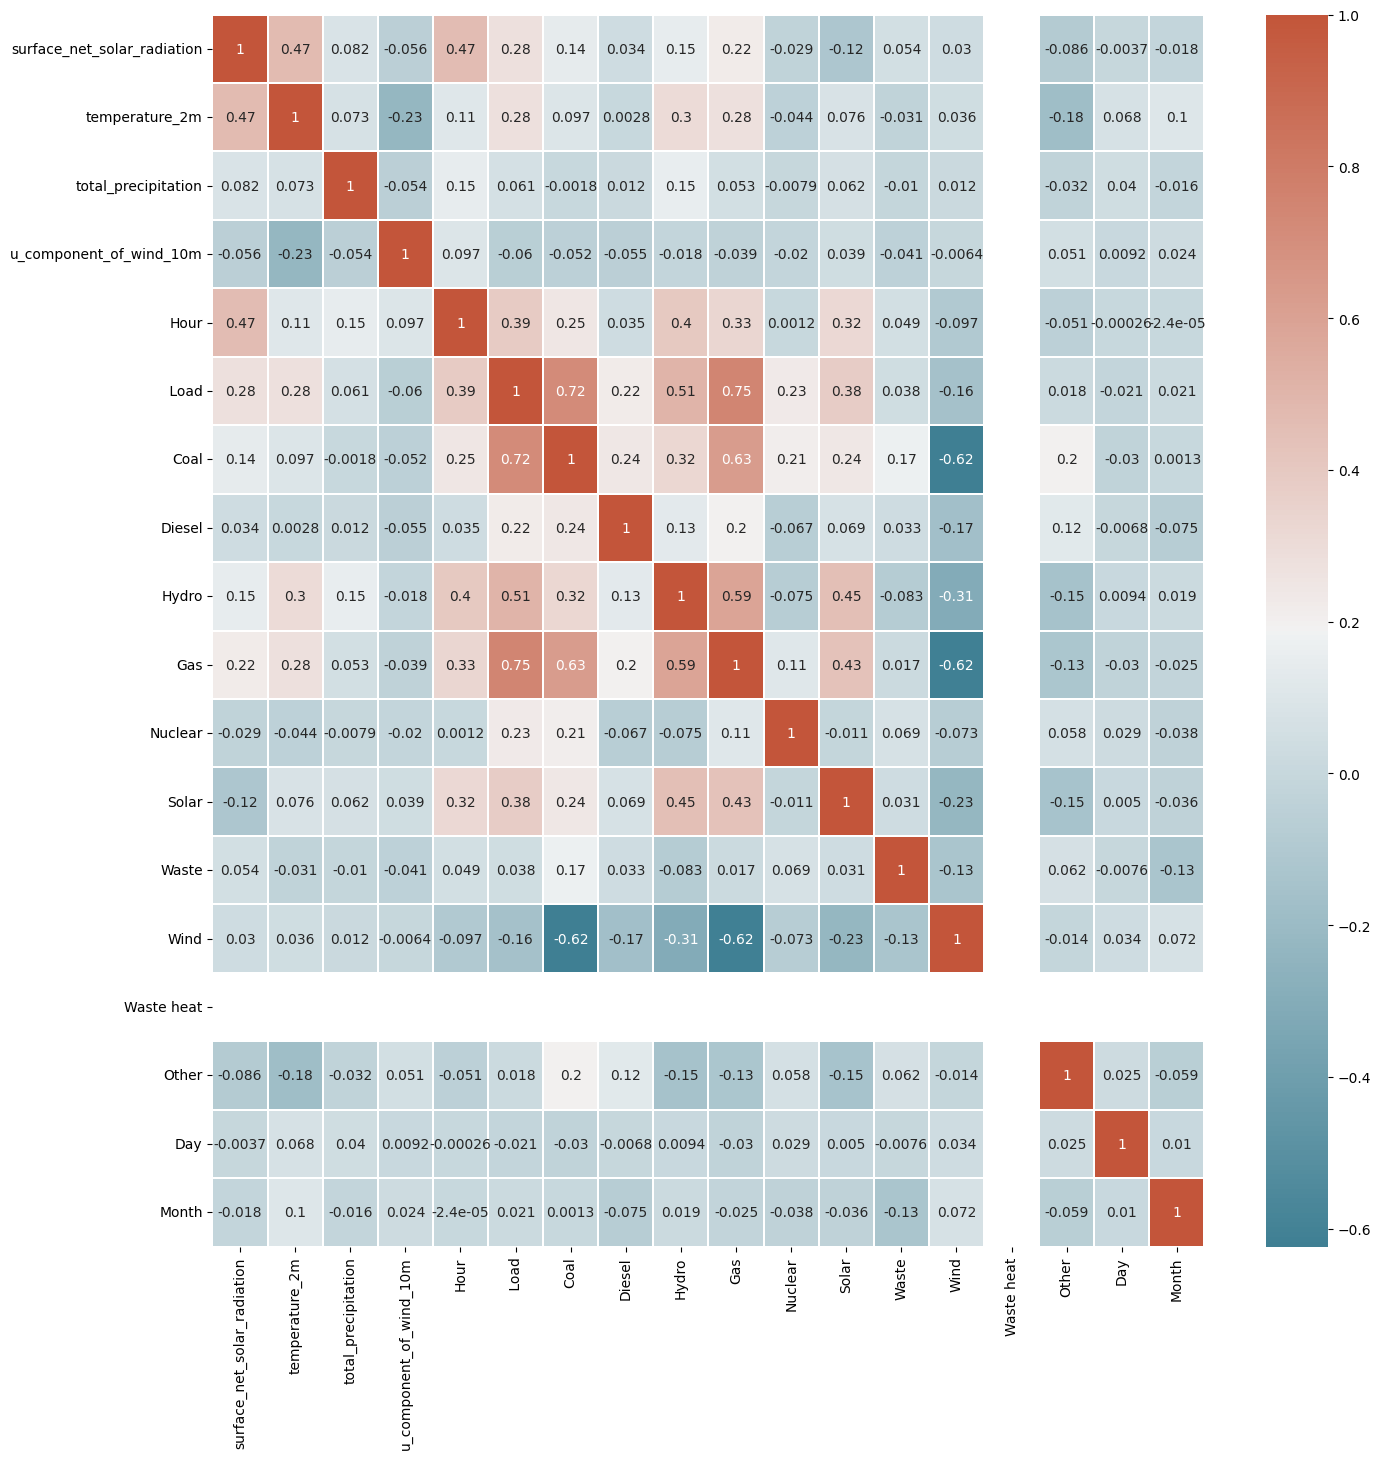

In [8]:
# calculate correlation matrix
df = pd.DataFrame(data)
corr = df.corr()
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Plot pairplots for data visualization processes**

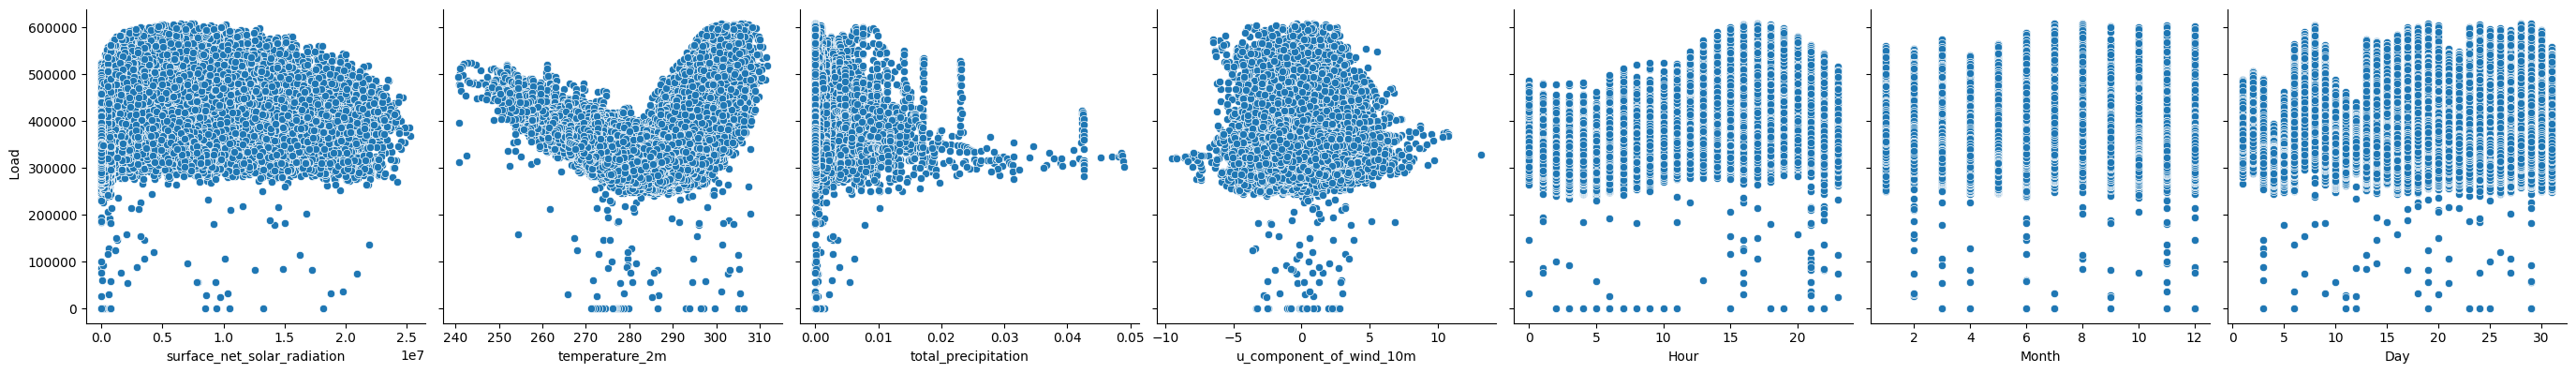

In [9]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data,
             x_vars=["surface_net_solar_radiation",
            "temperature_2m",
            "total_precipitation",
            "u_component_of_wind_10m",
            "Hour",
            "Month",
            "Day"],
             y_vars=' Load', height=4, aspect=1, kind='scatter')
plt.show()

**Split data into features and target variable**

In [10]:
columns = ["surface_net_solar_radiation",
            "temperature_2m",
            "total_precipitation",
            "u_component_of_wind_10m",
            "Hour",
            "Month",
            "Day"]
X = df[columns]
y = df[' Load']

**Feed data into training and test sets**

In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Import all necessary ML libraries**

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

**1. Predicting load from spatial and climate features**

**Default Random Forest Regression Model**

In [13]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = rf_regressor.predict(X_test)

In [17]:
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.8660550021429938


**Trying to improve the model through hyperparameter tuning and nullifying the possibility of overtraining during the default model**

In [18]:
rf_rs = RandomForestRegressor(random_state=42)

In [19]:
param_grid = {
    'n_estimators': np.arange(100),
    'max_depth': [None] + list(np.arange(10, 50, 5)),
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 7, 10]
}

In [20]:
random_search = RandomizedSearchCV(
    rf_rs,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring=make_scorer(mean_squared_error),  # Use mean squared error as the scoring metric
    cv=5,  # Number of folds in cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

In [21]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20, 25, 30,
                                                      35, 40, 45],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   scoring=make_scorer(mean_squared_error), verbose=1)

In [22]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 19, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 30}


In [23]:
best_model = random_search.best_estimator_

In [24]:
y_pred_rs = best_model.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rs))
print(f'Root Mean Squared Error on Test Set: {rmse}')
r2 = r2_score(y_test, y_pred_rs)
print(f'R-squared: {r2}')

Root Mean Squared Error on Test Set: 26550.164350467607
R-squared: 0.8445476188335882


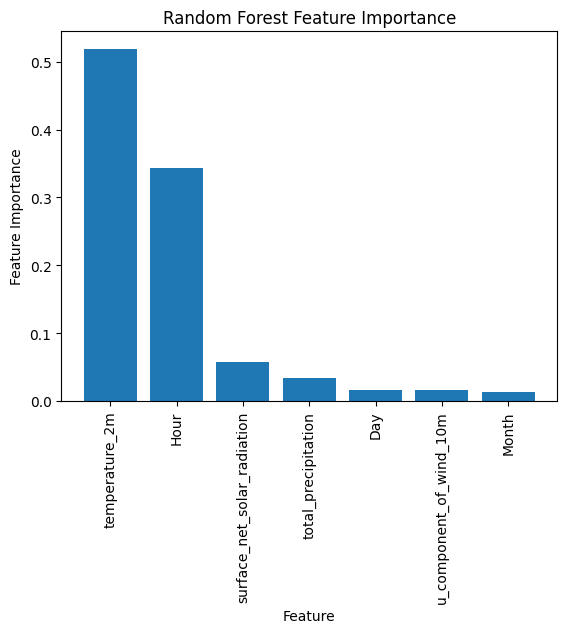

In [29]:
feature_importance = best_model.feature_importances_
Feature_names = X.columns.tolist()
feature_names = Feature_names

sorted_idx = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(np.arange(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.228049 to fit


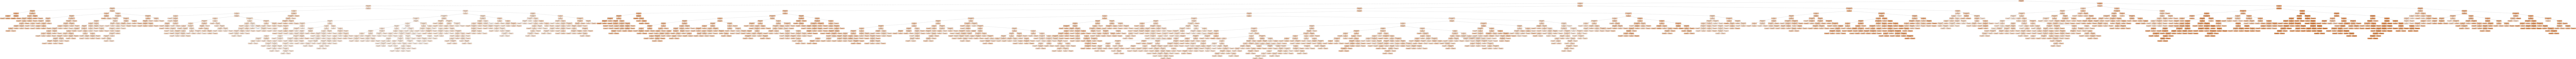

In [31]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import graphviz

# Extract the first decision tree from the random forest
first_tree = best_model.estimators_[0]

# Visualize the first decision tree
dot_data = export_graphviz(first_tree, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Display the decision tree here
display(Image(graph.render(format='png', cleanup=True)))

# graph.render("first_decision_tree", format="png", cleanup=True)


Boosting the best fit random forest with XGBoost

In [32]:
import xgboost as xgb

In [68]:
best_hyperparameters = random_search.best_params_
xgb_regressor = xgb.XGBRegressor(
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    learning_rate=0.18,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

In [69]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.18, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=19, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [70]:
y_pred_xgb = xgb_regressor.predict(X_test)

In [71]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Root Mean Squared Error with XGBoost: {rmse_xgb}')
r2 = r2_score(y_test, y_pred_xgb)
print(f'R-squared: {r2}')

Root Mean Squared Error with XGBoost: 22512.224877143544
R-squared: 0.8882365529764339


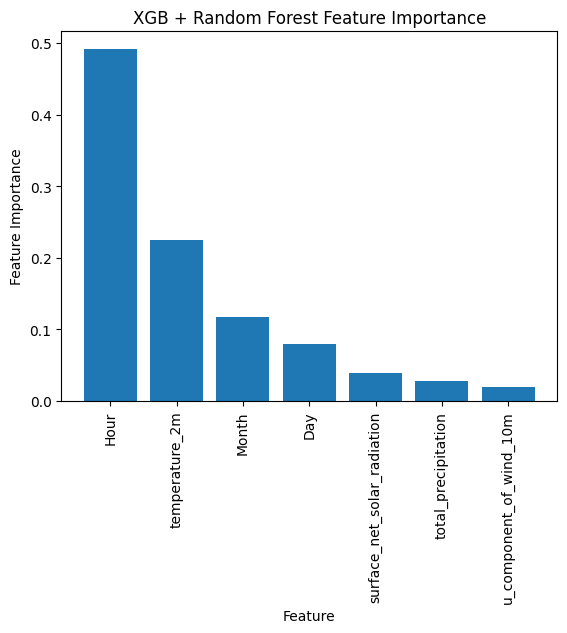

In [73]:
feature_importance = xgb_regressor.feature_importances_
Feature_names = X.columns.tolist()
feature_names = Feature_names

sorted_idx = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(np.arange(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('XGB + Random Forest Feature Importance')
plt.show()

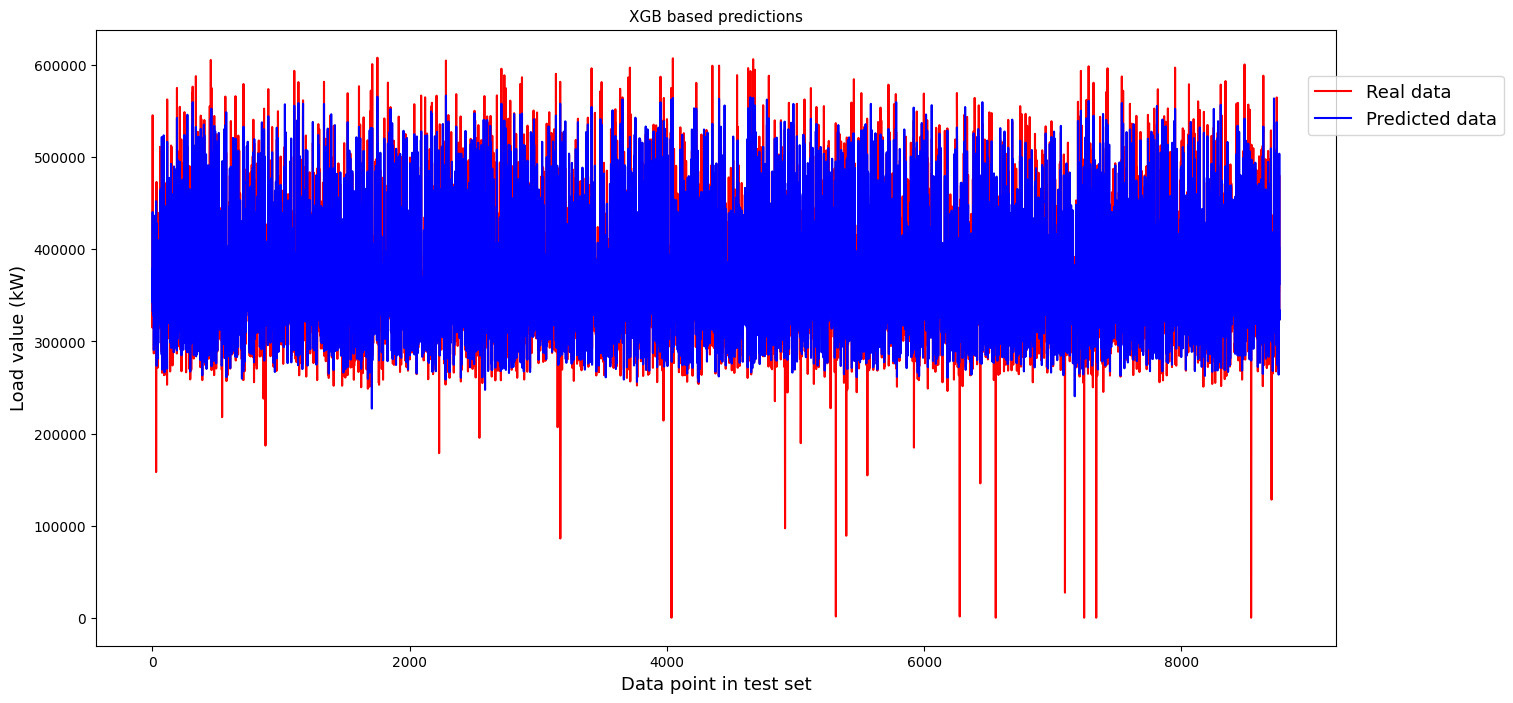

In [66]:
plt.figure(figsize=(16, 8))
plt.plot(np.array(y_test), color = 'red', label = 'Real data')
plt.plot(y_pred_rs, color = 'blue', label = 'Predicted data')
plt.xlabel('Data point in test set', fontsize=13)
plt.ylabel('Load value (kW)',fontsize=13)
plt.title('XGB based predictions', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.show()

In [ ]:
#Remaining steps:
#1. Try with a bunch of hyperparameters
#2. Inverse modeling

**2. Inverse modeling to find contribution of each energy source in producing desired/predicted amount of load**

In [74]:
X_im = data[[' Load',
             'Hour',
             'Day',
             'Month']].values
y_im = data[["Coal",
              "Diesel",
              "Hydro",
              "Gas",
              "Nuclear",
              "Solar",
              "Waste",
              "Wind",
              "Waste",
              "Waste heat",
              "Other"]].values

**Performing inverse modeling (one input, mulitple output) prediction task using Neural Networks**

In [75]:
X_im_train, X_im_test, y_im_train, y_im_test = train_test_split(X_im, y_im, test_size=0.2, random_state=42)

In [76]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_im_train_scaled = scaler_X.fit_transform(X_im_train)
X_im_test_scaled = scaler_X.transform(X_im_test)
y_im_train_scaled = scaler_y.fit_transform(y_im_train)
y_im_test_scaled = scaler_y.transform(y_im_test)

In [77]:
from keras.models import Sequential
from keras.layers import Dense

In [78]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_im_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=y_im_train.shape[1], activation='linear'))

In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
model.fit(X_im_train_scaled, y_im_train_scaled, epochs=25, batch_size=256, validation_split=0.25)

Epoch 1/25
83/83 [==============================] - 2s 6ms/step - loss: 0.8865 - val_loss: 0.8279
Epoch 2/25
83/83 [==============================] - 0s 4ms/step - loss: 0.8286 - val_loss: 0.7842
Epoch 3/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7955 - val_loss: 0.7630
Epoch 4/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7753 - val_loss: 0.7447
Epoch 5/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7551 - val_loss: 0.7259
Epoch 6/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7366 - val_loss: 0.7095
Epoch 7/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7212 - val_loss: 0.6985
Epoch 8/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7100 - val_loss: 0.6882
Epoch 9/25
83/83 [==============================] - 0s 4ms/step - loss: 0.7012 - val_loss: 0.6817
Epoch 10/25
83/83 [==============================] - 0s 4ms/step - loss: 0.6945 - val_loss: 0.6747
Epoch 11/25
83/83 [

In [81]:
predictions_im_scaled = model.predict(X_im_test_scaled)
mse_im = mean_squared_error(y_im_test_scaled, predictions_im_scaled)
print(f'Mean Squared Error: {mse_im}')

220/220 [==============================] - 0s 2ms/step
Mean Squared Error: 0.6555029917449384


In [82]:
predictions_im_scaled

array([[ 1.10934794e-01,  1.80421993e-02,  4.35115248e-01, ...,
        -2.50709355e-01,  6.25845132e-07, -3.09340417e-01],
       [ 2.36255467e-01,  2.59095401e-01,  1.25816345e-01, ...,
        -7.76382461e-02,  1.10644578e-05, -6.37465939e-02],
       [-7.00853825e-01, -2.04126596e-01,  1.00426733e-01, ...,
         2.19275653e-01,  8.37326661e-06, -5.58692105e-02],
       ...,
       [ 1.26631618e-01,  5.74116409e-02, -3.57040823e-01, ...,
         2.24990472e-02, -5.33780985e-06,  2.19308764e-01],
       [-1.65823698e-01, -1.81667298e-01,  2.67819762e-02, ...,
         7.81913847e-03, -2.04650132e-06, -1.67544838e-02],
       [ 1.63282716e+00,  5.80957055e-01,  1.31109679e+00, ...,
        -1.31732315e-01, -1.35200280e-05, -2.02573046e-01]], dtype=float32)

In [84]:
new_load_im = np.array([[350000, 1, 1, 1]])  # Example load value
new_load_im_scaled = scaler_X.transform(new_load_im)
contributions_im_scaled = model.predict(new_load_im_scaled)
contributions_im = scaler_y.inverse_transform(contributions_im_scaled)
print(f'Predicted contributions from each source: {contributions_im}')

1/1 [==============================] - 0s 52ms/step
Predicted contributions from each source: [[1.3361598e+05 2.0158055e+02 9.7481895e+03 6.5829953e+04 2.3973459e+04
  1.0807435e+01 1.3583240e+02 1.2133059e+05 1.3541161e+02 6.8230038e-06
  3.6702332e+02]]


In [85]:
y_pred_xgb

array([375854.9 , 374760.16, 330166.38, ..., 486715.3 , 323865.  ,
       336210.5 ], dtype=float32)

In [46]:
# Step 1: Prepare the input array for prediction
new_load_values = np.reshape(y_pred_xgb, (-1, 1))  # Reshape to a column vector

# Step 2: Scale the input values using the same scaler used during training
new_load_values_scaled = scaler_X.transform(new_load_values)

# Step 3: Predict contributions using the trained neural network model
contributions_scaled = model.predict(new_load_values_scaled)

# Step 4: Inversely transform the predicted contributions to the original scale
contributions = scaler_y.inverse_transform(contributions_scaled)

# Step 5: Print the predicted contributions
print(f'Predicted contributions from each source:\n{contributions}')

274/274 [==============================] - 1s 3ms/step
Predicted contributions from each source:
[[1.37334719e+05 1.30695953e+02 1.66186406e+04 ... 1.18341761e+01
  1.54292297e+01 6.30419874e+00]
 [1.40531125e+05 1.33104706e+02 1.68435918e+04 ... 1.19284458e+01
  1.53480892e+01 6.28142309e+00]
 [1.19902234e+05 1.30929611e+02 1.63918926e+04 ... 1.23447762e+01
  1.60696735e+01 6.59846258e+00]
 ...
 [1.91058672e+05 4.26922058e+02 2.27957969e+04 ... 1.55225487e+01
  1.54941139e+01 6.72312498e+00]
 [1.08009820e+05 1.16105965e+02 1.51388291e+04 ... 1.06461983e+01
  1.59883471e+01 6.66022825e+00]
 [1.14500375e+05 1.25566940e+02 1.59186758e+04 ... 1.18970499e+01
  1.60526695e+01 6.67473269e+00]]


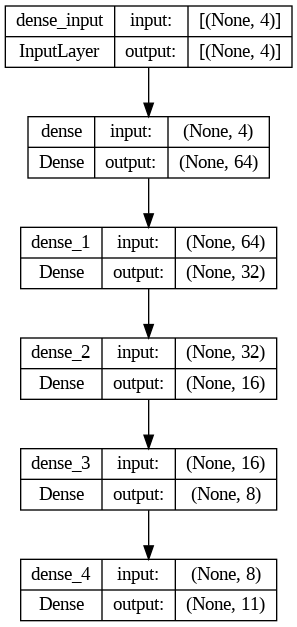

In [86]:
from keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)